In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.units as units
import matplotlib.ticker as ticker
import random
import time                   # To time processes
import warnings               # To suppress warnings
import itertools
import datetime
import tensorflow as tf
import csv
import math
import calendar

from random import shuffle
from pandas import read_csv
from sklearn import metrics
from sklearn import svm
from matplotlib import pyplot
from numpy import array
from numpy import argmax
from scipy import stats
from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_curve

from sklearn.utils import class_weight
from sklearn.utils.fixes import signature
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.base import TransformerMixin
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import Callback

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler

from matplotlib.pyplot import *
import matplotlib.pyplot as plotter
from prettytable import PrettyTable


warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
df=read_csv("matches.csv")

<font color=darkblue size=5px>**Results of the match when a team won the toss**</font>


In [3]:
win=0
loss=0
nr=0

for i in range(0,df.shape[0]):
    if(df.iloc[i]['result']=="no result"):
        nr+=1
    elif(df.iloc[i]['toss_winner']==df.iloc[i]['winner']):
        win+=1
    elif(df.iloc[i]['toss_winner']!=df.iloc[i]['winner']):
        loss+=1

<br><h2><font color=darkblue>Donut chart representation of the distribution of results</font></h2><br>

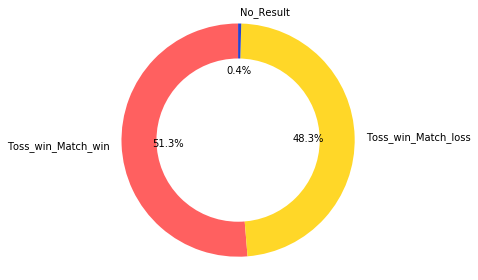

In [4]:
pieLabels=['Toss_win_Match_win', 'Toss_win_Match_loss', 'No_Result']
temp_series=[win,loss,nr]
colors = ['#ff6060','#ffd728','#2944ce']
fig1, ax1 = plt.subplots()
ax1.pie(temp_series, colors = colors, labels=pieLabels, autopct='%1.1f%%', startangle=90) 
    
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
    
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<br><h2><font color=darkblue>Toss decisions based on Venue</font></h2>

In [5]:
temp=pd.melt(df, id_vars=['venue'], value_vars=['toss_decision'])

temp=temp.sort_values(['venue','value'] )

temp=temp.reset_index(drop=True)

temp.head()

,venue,variable,value
0,Barabati Stadium,toss_decision,bat
1,Barabati Stadium,toss_decision,bat
2,Barabati Stadium,toss_decision,field
3,Barabati Stadium,toss_decision,field
4,Barabati Stadium,toss_decision,field


In [6]:
temp1=pd.crosstab(index=temp['value'], columns=temp['venue']).T

temp1=temp1.sort_values(['field','bat'], ascending=[False,False])

temp1.head()

value,bat,field
venue,,
M Chinnaswamy Stadium,9,64
Wankhede Stadium,21,45
Eden Gardens,28,42
Feroz Shah Kotla,28,39
"Rajiv Gandhi International Stadium, Uppal",25,31


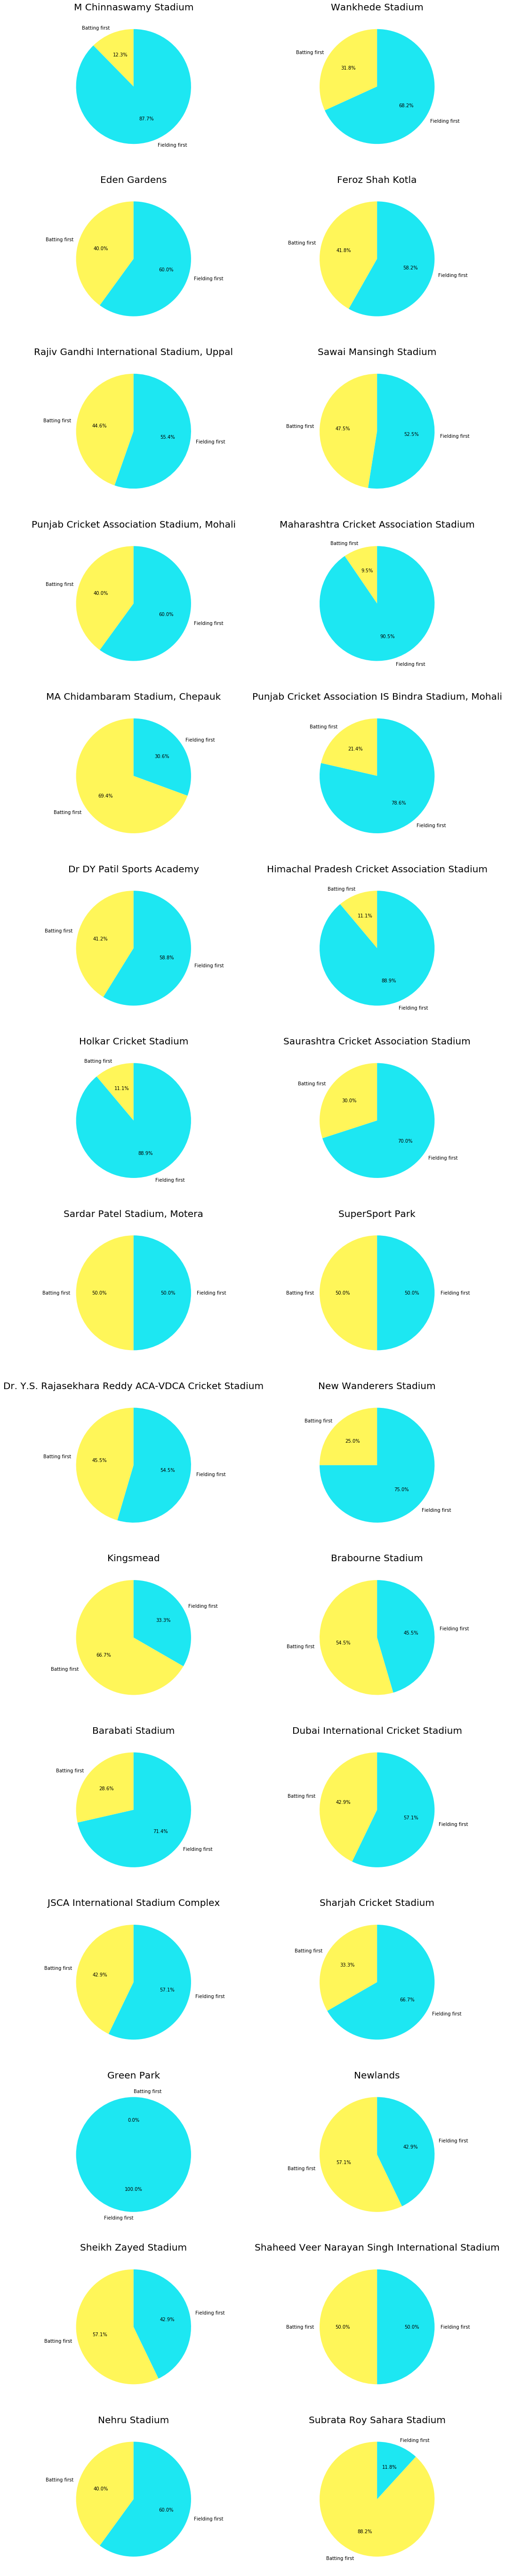

In [7]:
fig1, axes = plt.subplots(15, 2, figsize=(17, 100))
for i in range(0,30):
    ax1 = axes[i//2, i%2]
    pieLabels=['Batting first', 'Fielding first']
    temp_series=[temp1['bat'][i], temp1['field'][i]]
    colors = ['#fff659','#1de7f2']
    pie=ax1.pie(temp_series, colors = colors, labels=pieLabels, autopct='%1.1f%%', startangle=90, radius=1) 
    ax1.set_title(temp1.index[i], fontsize=20, pad=10)
    
fig.subplots_adjust(wspace=.6)

<br><h2><font color=darkblue>Decisions made by teams upon winning the toss</font></h2>

In [8]:
temp=pd.melt(df, id_vars=['toss_winner'], value_vars=['toss_decision'])

temp=temp.sort_values(['toss_winner','value'] )

temp=temp.reset_index(drop=True)

temp.head()

,toss_winner,variable,value
0,Chennai Super Kings,toss_decision,bat
1,Chennai Super Kings,toss_decision,bat
2,Chennai Super Kings,toss_decision,bat
3,Chennai Super Kings,toss_decision,bat
4,Chennai Super Kings,toss_decision,bat


In [9]:
temp1=pd.crosstab(index=temp['value'], columns=temp['toss_winner']).T

temp1=temp1.sort_values(['field','bat'], ascending=[False,False])

temp1.head()

value,bat,field
toss_winner,,
Kolkata Knight Riders,30,57
Royal Challengers Bangalore,20,57
Delhi Daredevils,29,51
Mumbai Indians,41,49
Kings XI Punjab,26,49


In [10]:
bat=[]
field=[]
team_name=[]

for i in range(0,13):
    team_name.append(temp1.index[i])
    bat.append(temp1['bat'][i])
    field.append(temp1['field'][i])

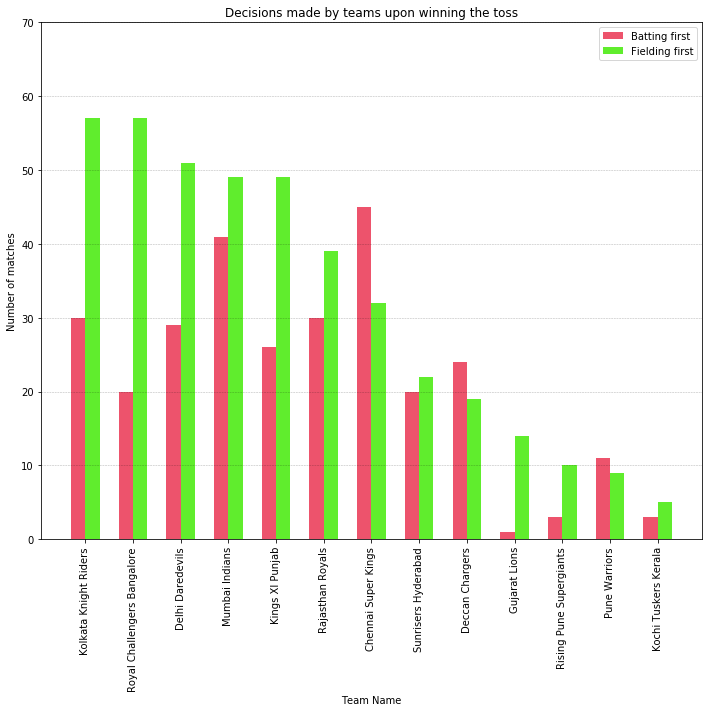

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

width = 0.3
x = np.arange(len(team_name))


ax.bar(x, bat, width, color='#ed536c', label='Batting first')
ax.bar(x + width, field, width, color='#60ed2d', label='Fielding first')

ax.set_ylabel('Number of matches')
ax.set_ylim(0,70)
ax.set_xticks(x + width/2)
ax.set_xticklabels(team_name, rotation=90)
ax.set_xlabel('Team Name')
ax.set_title('Decisions made by teams upon winning the toss')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()